In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
#Import combine data

combine = pd.read_excel("/Users/stuart/Desktop/Working Documents/NBA Analysis/Eight Sleep Copy/Data/Draft Combine Data.xlsx")

In [4]:
#Data Types

combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DraftYear      1552 non-null   object
 1   Player         1552 non-null   object
 2   Position       1547 non-null   object
 3   BodyFat        1552 non-null   object
 4   HandLength     1552 non-null   object
 5   HandWidth      1552 non-null   object
 6   HeightWOShoes  1508 non-null   object
 7   HeightWShoes   1205 non-null   object
 8   StandReach     1507 non-null   object
 9   Weight         1552 non-null   object
 10  Wingspan       1509 non-null   object
 11  Agility        1551 non-null   object
 12  Shuttle        1551 non-null   object
 13  Sprint         1551 non-null   object
 14  VJStand        1551 non-null   object
 15  VJMax          1551 non-null   object
 16  BenchPress     1551 non-null   object
dtypes: object(17)
memory usage: 206.3+ KB


In [5]:
#All Combine Data

pd.set_option('display.max.rows', 1560)
pd.set_option('display.max.columns', 17)


In [6]:
#Drop Duplicates

combine = combine.drop_duplicates()

In [7]:
#Sort by Draft Year and Name

combine.sort_values(["DraftYear","Player"],axis=0, 
                    ascending=[True, True], 
                    inplace=True, 
                    kind='quicksort', 
                    na_position='last')


In [8]:
#Drop Columns (Body Fat, Hands, Height with Shoes, Stand and Reach)

combine = combine.drop(columns = ['BodyFat', 'HandLength', 'HandWidth', 'HeightWShoes', 'StandReach'])



In [9]:
#Reset Index

combine = combine.reset_index(drop=True)


In [10]:
#Select Years to Analyze

combine2 = combine.iloc[:846]


In [11]:
#Import Draft Data

draft = pd.read_excel("/Users/stuart/Desktop/Working Documents/NBA Analysis/Eight Sleep Copy/Data/Draft and Career Data.xlsx")

draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    1367 non-null   object 
 1   Year      1372 non-null   int64  
 2   League    1372 non-null   object 
 3   Round     1372 non-null   int64  
 4   Pick      1372 non-null   int64  
 5   Team      1372 non-null   object 
 6   Age       1365 non-null   float64
 7   Position  1363 non-null   object 
 8   Born      1364 non-null   object 
 9   College   1059 non-null   object 
 10  From      1191 non-null   float64
 11  To        1191 non-null   float64
 12  WS        1191 non-null   float64
 13  Games     1191 non-null   float64
 14  MinGame   1191 non-null   float64
 15  PtsGame   1191 non-null   float64
 16  RebGame   1191 non-null   float64
 17  AstGame   1191 non-null   float64
 18  StlGame   1191 non-null   float64
 19  BlkGame   1191 non-null   float64
 20  PercFG    1188 non-null   floa

In [12]:
pd.set_option('display.max.rows', 1380)
pd.set_option('display.max.columns', 26)


In [13]:
#Drop Duplicates

draft = draft.drop_duplicates()

#Sort by Draft Year and Name

draft.sort_values(["Year","Player"],axis=0, 
                    ascending=[True, True], 
                    inplace=True, 
                    kind='quicksort', 
                    na_position='last')

In [14]:
#Drop Columns (League, Position, Born, College, From, To)

draft = draft.drop(columns = ['League', 'Position', 'Born', 'College', 'From', 'To'])


In [15]:
#Reset Index

draft = draft.reset_index(drop=True)


In [16]:
#Select Years to Analyze

draft2 = draft.iloc[:712]


In [17]:
#Change Player Name to String

draft2['Player'] = draft2['Player'].astype("string")

/var/folders/b2/52m769t53_5gcry21p8k0_1w0000gn/T/ipykernel_60612/3958105382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft2['Player'] = draft2['Player'].astype("string")


In [18]:
#Replace Special Characters from Names

draft2['Player'] = draft2['Player'].str.replace(u"á", "a")
draft2['Player'] = draft2['Player'].str.replace(u"ä", "a")
draft2['Player'] = draft2['Player'].str.replace(u"ã", "a")
draft2['Player'] = draft2['Player'].str.replace(u"ā", "a")

draft2['Player'] = draft2['Player'].str.replace(u"ć", "c")
draft2['Player'] = draft2['Player'].str.replace(u"č", "c")
draft2['Player'] = draft2['Player'].str.replace(u"Č", "C")
draft2['Player'] = draft2['Player'].str.replace(u"ç", "c")

draft2['Player'] = draft2['Player'].str.replace(u"é", "e")
draft2['Player'] = draft2['Player'].str.replace(u"ê", "e")
draft2['Player'] = draft2['Player'].str.replace(u"ë", "e")

draft2['Player'] = draft2['Player'].str.replace(u"ğ", "g")

draft2['Player'] = draft2['Player'].str.replace(u"ï", "i")
draft2['Player'] = draft2['Player'].str.replace(u"í", "i")

draft2['Player'] = draft2['Player'].str.replace(u"ņ", "n")

draft2['Player'] = draft2['Player'].str.replace(u"ö", "o")
draft2['Player'] = draft2['Player'].str.replace(u"ô", "o")
draft2['Player'] = draft2['Player'].str.replace(u"ó", "o")
draft2['Player'] = draft2['Player'].str.replace(u"Ö", "O")

draft2['Player'] = draft2['Player'].str.replace(u"š", "s")
draft2['Player'] = draft2['Player'].str.replace(u"ş", "s")

draft2['Player'] = draft2['Player'].str.replace(u"ü", "u")
draft2['Player'] = draft2['Player'].str.replace(u"ú", "u")
draft2['Player'] = draft2['Player'].str.replace(u"ū", "u")

draft2['Player'] = draft2['Player'].str.replace(u"ý", "y")

draft2['Player'] = draft2['Player'].str.replace(u"ž", "z")
draft2['Player'] = draft2['Player'].str.replace(u"Ž", "Z")


draft2['Player'] = draft2['Player'].str.replace(u"sOn", "son")
draft2['Player'] = draft2['Player'].str.replace(u"ß", "b")



/var/folders/b2/52m769t53_5gcry21p8k0_1w0000gn/T/ipykernel_60612/2976494537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft2['Player'] = draft2['Player'].str.replace(u"á", "a")
/var/folders/b2/52m769t53_5gcry21p8k0_1w0000gn/T/ipykernel_60612/2976494537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft2['Player'] = draft2['Player'].str.replace(u"ä", "a")
/var/folders/b2/52m769t53_5gcry21p8k0_1w0000gn/T/ipykernel_60612/2976494537.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

In [19]:
#Merge datasets by name

nbadata = pd.merge(combine2, draft2)
nbadata.columns
nbadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DraftYear      436 non-null    object 
 1   Player         436 non-null    object 
 2   Position       435 non-null    object 
 3   HeightWOShoes  434 non-null    object 
 4   Weight         436 non-null    object 
 5   Wingspan       434 non-null    object 
 6   Agility        436 non-null    object 
 7   Shuttle        436 non-null    object 
 8   Sprint         436 non-null    object 
 9   VJStand        436 non-null    object 
 10  VJMax          436 non-null    object 
 11  BenchPress     436 non-null    object 
 12  Year           436 non-null    int64  
 13  Round          436 non-null    int64  
 14  Pick           436 non-null    int64  
 15  Team           436 non-null    object 
 16  Age            435 non-null    float64
 17  WS             394 non-null    float64
 18  Games     

In [20]:
#Output of Merge

pd.set_option('display.max.rows', 436)
pd.set_option('display.max.columns', 33)

nbadata.fillna('', inplace=True)


/var/folders/b2/52m769t53_5gcry21p8k0_1w0000gn/T/ipykernel_60612/2334786171.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  nbadata.fillna('', inplace=True)


In [21]:
#Organize Position

nbadata['Position'] = nbadata['Position'].astype(str)

nbadata[["Pos1", "Pos2"]] = nbadata['Position'].str.split('-', expand=True)

nbadata = nbadata.drop(columns = ['Position', 'Pos2'])

nbadata = nbadata[nbadata.Pos1 != None]
nbadata = nbadata[nbadata.Pos1 != '']
nbadata = nbadata[nbadata.Pos1 != ' ']


In [22]:
#Organize Height
#Eliminate Shuttle Column

nbadata['HeightWOShoes'] = nbadata['HeightWOShoes'].astype(str)

nbadata[["Feet", "Inches"]] = nbadata['HeightWOShoes'].str.split(' ', expand=True)

nbadata = nbadata.drop(columns = ['HeightWOShoes', 'Shuttle'])

nbadata['Feet'] = nbadata['Feet'].str.strip("''")
nbadata['Inches'] = nbadata['Inches'].str.strip("''")


In [23]:
#Change Height to Integer and Calculate Total Height


nbadata['Feet'] = pd.to_numeric(nbadata['Feet'])
nbadata['Inches'] = pd.to_numeric(nbadata['Inches'])

nbadata['Height'] = (nbadata['Feet'] * 12) + nbadata['Inches']


In [24]:
#Assign to Pick Groups

nbadata['Pick'] = pd.to_numeric(nbadata['Pick'])

nbadata['PickGroup'] = nbadata['Pick'].apply(lambda x: '1A' if x < 16 else 
                                             '1B' if (15 < x < 31) else 
                                             '2A' if (30 < x < 46) else
                                             '2B' if x > 45 else 'False')


In [25]:
#Elimiate dashes in data

nbadata['Weight'] = nbadata['Weight'].astype(str)
nbadata['Agility'] = nbadata['Agility'].astype(str)
nbadata['Sprint'] = nbadata['Sprint'].astype(str)
nbadata['VJStand'] = nbadata['VJStand'].astype(str)
nbadata['VJMax'] = nbadata['VJMax'].astype(str)
nbadata['BenchPress'] = nbadata['BenchPress'].astype(str)

nbadata['Weight'] = nbadata['Weight'].str.strip('-')
nbadata['Agility'] = nbadata['Agility'].str.strip('-')
nbadata['Sprint'] = nbadata['Sprint'].str.strip('-')
nbadata['VJStand'] = nbadata['VJStand'].str.strip('-')
nbadata['VJMax'] = nbadata['VJMax'].str.strip('-')
nbadata['BenchPress'] = nbadata['BenchPress'].str.strip('-')

nbadata['Weight'] = pd.to_numeric(nbadata['Weight'])
nbadata['Agility'] = pd.to_numeric(nbadata['Agility'])
nbadata['Sprint'] = pd.to_numeric(nbadata['Sprint'])
nbadata['VJStand'] = pd.to_numeric(nbadata['VJStand'])
nbadata['VJMax'] = pd.to_numeric(nbadata['VJMax'])
nbadata['BenchPress'] = pd.to_numeric(nbadata['BenchPress'])
nbadata['Age'] = pd.to_numeric(nbadata['Age'])
nbadata['WS'] = pd.to_numeric(nbadata['WS'])
nbadata['Games'] = pd.to_numeric(nbadata['Games'])
nbadata['MinGame'] = pd.to_numeric(nbadata['MinGame'])
nbadata['PtsGame'] = pd.to_numeric(nbadata['PtsGame'])
nbadata['RebGame'] = pd.to_numeric(nbadata['RebGame'])
nbadata['AstGame'] = pd.to_numeric(nbadata['AstGame'])
nbadata['StlGame'] = pd.to_numeric(nbadata['StlGame'])
nbadata['BlkGame'] = pd.to_numeric(nbadata['BlkGame'])
nbadata['WSp48'] = pd.to_numeric(nbadata['WSp48'])
nbadata['Pick'] = pd.to_numeric(nbadata['Pick'])

nbadata

,DraftYear,Player,Weight,Wingspan,Agility,Sprint,VJStand,VJMax,BenchPress,Year,Round,Pick,Team,Age,WS,Games,MinGame,PtsGame,RebGame,AstGame,StlGame,BlkGame,PercFG,Perc2,Perc3,PercFT,WSp48,Pos1,Feet,Inches,Height,PickGroup
0,2000-01,A.J. Guyton,175.0,6' 3.75'',10.55,3.22,33.0,37.5,9.0,2000,2,32,CHI,22.142,0.3,80.0,15.6,5.5,1.0,1.8,0.3,0.2,0.377,0.377,0.378,0.822,0.010,PG,6.0,0.75,72.75,2A
1,2000-01,Antonis Fotsis,219.0,6' 8.5'',11.60,3.44,27.0,30.0,2.0,2001,2,48,MEM,20.092,0.1,28.0,11.4,3.9,2.2,0.4,0.3,0.4,0.404,0.432,0.304,0.85,0.017,SF,6.0,9.25,81.25,2B
2,2000-01,Chris Porter,214.0,6' 9.5'',10.93,3.20,28.5,35.0,6.0,2000,2,55,GSW,22.056,0.2,51.0,22.5,8.6,3.7,1.2,0.9,0.1,0.389,0.393,0.0,0.667,0.008,SF,6.0,5.50,77.50,2B
3,2000-01,Cory Hightower,183.0,6' 11'',11.92,3.37,29.5,34.5,NaN,2000,2,54,SAS,20.339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,NaN,SG,6.0,5.50,77.50,2B
4,2000-01,Dan Langhi,197.5,6' 8'',10.85,3.24,31.0,34.5,12.0,2000,2,31,DAL,22.218,0.3,133.0,9.4,3.0,1.5,0.3,0.2,0.1,0.391,0.4,0.289,0.613,0.012,SF,6.0,9.00,81.00,2A
5,2000-01,Dan McClintock,250.0,7' 1.5'',11.52,3.33,33.0,35.0,20.0,2000,2,53,DEN,23.076,0.0,6.0,9.7,3.0,2.8,0.2,0.0,0.3,0.5,0.5,,0.0,0.007,C,6.0,11.00,83.00,2B
6,2000-01,Donnell Harvey,220.0,7' 0.5'',11.23,NaN,33.0,32.5,15.0,2000,1,22,NYK,19.311,4.7,205.0,16.2,5.6,4.0,0.8,0.5,0.4,0.46,0.464,0.1,0.659,0.069,PF,6.0,7.25,79.25,1B
7,2000-01,Eddie House,176.5,6' 3.5'',11.12,3.27,29.5,38.5,5.0,2000,2,37,MIA,22.051,20.0,717.0,17.3,7.5,1.7,1.6,0.7,0.1,0.409,0.423,0.39,0.851,0.077,SG,5.0,11.75,71.75,2A
8,2000-01,Eduardo Najera,234.5,6' 11.5'',11.38,3.45,28.0,35.0,15.0,2000,2,38,HOU,23.358,24.7,619.0,18.1,4.9,3.7,0.8,0.7,0.4,0.481,0.509,0.311,0.671,0.106,PF,6.0,6.50,78.50,2A
9,2000-01,Ernest Brown,222.5,7' 1.25'',NaN,NaN,NaN,NaN,2.0,2000,2,52,MIA,21.048,-0.2,3.0,7.0,1.0,2.0,0.0,0.0,0.3,0.167,0.167,,0.25,-0.349,C,6.0,10.00,82.00,2B


In [26]:
#Weight ANOVA

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

nbadata_weight = nbadata.dropna(subset=['Weight'])

formula = 'Weight ~ PickGroup'
model = ols(formula, nbadata_weight).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = nbadata_weight['Weight'],
                         groups = nbadata_weight['PickGroup'],
                         alpha = 0.05)

tukey.summary()

                  sum_sq     df         F    PR(>F)
PickGroup    5890.484331    3.0  2.771889  0.041198
Residual   303886.378394  429.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1A,1B,-9.759,0.0274,-18.754,-0.7639,True
1A,2A,-2.4594,0.8958,-11.4793,6.5606,False
1A,2B,-4.9701,0.5075,-14.2055,4.2652,False
1B,2A,7.2996,0.2036,-2.289,16.8883,False
1B,2B,4.7888,0.5881,-5.0027,14.5804,False
2A,2B,-2.5108,0.9121,-12.3252,7.3036,False


<Axes: title={'center': 'Weight'}, xlabel='PickGroup'>

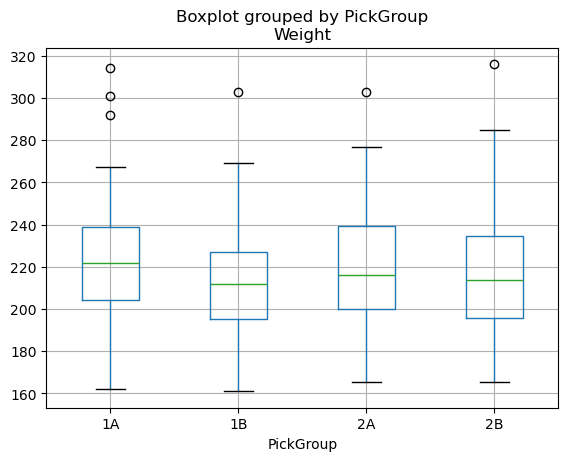

In [27]:
#Weight Boxplot

nbadata_weight.boxplot('Weight', by='PickGroup')

In [28]:
#Weight Bonferoni post-hoc

from scipy import stats

pick_types = nbadata_weight.PickGroup.unique()
ttests = []

for i, e in enumerate(pick_types):
    for i2, e2 in enumerate(pick_types):
        if i2 > i:
            g1 = nbadata_weight[nbadata_weight.PickGroup == e]['Weight']
            g2 = nbadata_weight[nbadata_weight.PickGroup == e2]['Weight']
            t, p = stats.ttest_ind(g1, g2)
            
            ttests.append(f'{e} - {e2}: {t.round(4)}, {p.round(4)}')
            
threshold = 0.05 / len(ttests)
print(f'Significant t-tests below {threshold}:')

Significant t-tests below 0.008333333333333333:


In [29]:
#Height ANOVA

nbadata_height = nbadata.dropna(subset=['Height'])

formula = 'Height ~ PickGroup'
model = ols(formula, nbadata_height).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = nbadata_height['Height'],
                         groups = nbadata_height['PickGroup'],
                         alpha = 0.05)

tukey.summary()

                sum_sq     df         F    PR(>F)
PickGroup   119.411715    3.0  3.366674  0.018612
Residual   5072.030548  429.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1A,1B,-1.3824,0.0122,-2.5445,-0.2203,True
1A,2A,-0.7932,0.2964,-1.9585,0.3721,False
1A,2B,-0.9316,0.1844,-2.1247,0.2615,False
1B,2A,0.5892,0.6102,-0.6496,1.828,False
1B,2B,0.4508,0.7947,-0.8142,1.7158,False
2A,2B,-0.1384,0.9922,-1.4063,1.1295,False


<Axes: title={'center': 'Height'}, xlabel='PickGroup'>

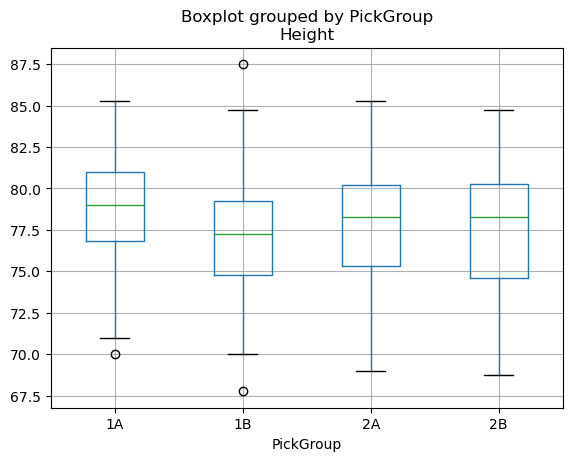

In [30]:
#Height Boxplot

nbadata_height.boxplot('Height', by='PickGroup')

In [31]:
#Agility ANOVA

nbadata_agility = nbadata.dropna(subset=['Agility'])

formula = 'Agility ~ PickGroup'
model = ols(formula, nbadata_agility).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = nbadata_agility['Agility'],
                         groups = nbadata_agility['PickGroup'],
                         alpha = 0.05)

tukey.summary()

               sum_sq     df         F    PR(>F)
PickGroup    2.157982    3.0  2.294853  0.077386
Residual   123.813704  395.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1A,1B,-0.1613,0.1491,-0.3579,0.0352,False
1A,2A,-0.0784,0.7363,-0.2761,0.1194,False
1A,2B,0.0336,0.9732,-0.1681,0.2354,False
1B,2A,0.083,0.7435,-0.1289,0.2948,False
1B,2B,0.195,0.0922,-0.0206,0.4105,False
2A,2B,0.112,0.5418,-0.1046,0.3287,False


<Axes: title={'center': 'Agility'}, xlabel='PickGroup'>

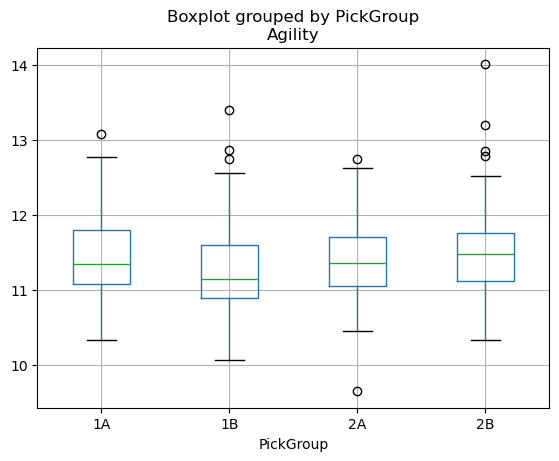

In [32]:
#Agility Boxplot

nbadata_agility.boxplot('Agility', by='PickGroup')

In [33]:
#Sprint ANOVA

nbadata_sprint = nbadata.dropna(subset=['Sprint'])

formula = 'Sprint ~ PickGroup'
model = ols(formula, nbadata_sprint).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = nbadata_sprint['Sprint'],
                         groups = nbadata_sprint['PickGroup'],
                         alpha = 0.05)

tukey.summary()

             sum_sq     df         F    PR(>F)
PickGroup  0.062183    3.0  1.184051  0.315501
Residual   6.984763  399.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1A,1B,-0.0178,0.7534,-0.0641,0.0285,False
1A,2A,0.012,0.9104,-0.0345,0.0584,False
1A,2B,0.0154,0.837,-0.032,0.0627,False
1B,2A,0.0298,0.4152,-0.0201,0.0797,False
1B,2B,0.0332,0.3327,-0.0176,0.084,False
2A,2B,0.0034,0.9982,-0.0475,0.0543,False


<Axes: title={'center': 'Sprint'}, xlabel='PickGroup'>

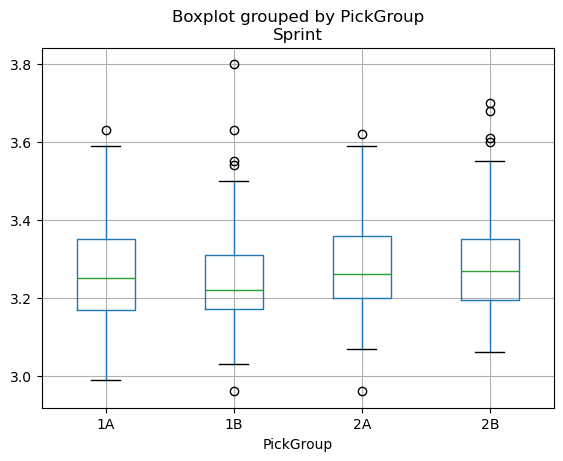

In [34]:
#Sprint boxplot

nbadata_sprint.boxplot('Sprint', by='PickGroup')

In [35]:
#VJStand ANOVA

nbadata_vjstand = nbadata.dropna(subset=['VJStand'])

formula = 'VJStand ~ PickGroup'
model = ols(formula, nbadata_vjstand).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = nbadata_vjstand['VJStand'],
                         groups = nbadata_vjstand['PickGroup'],
                         alpha = 0.05)

tukey.summary()

                sum_sq     df        F    PR(>F)
PickGroup    58.162016    3.0  2.30621  0.076221
Residual   3371.039219  401.0      NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1A,1B,0.0712,0.9979,-0.9401,1.0824,False
1A,2A,-0.792,0.1821,-1.8033,0.2193,False
1A,2B,-0.6492,0.375,-1.6905,0.3921,False
1B,2A,-0.8632,0.171,-1.9485,0.2222,False
1B,2B,-0.7204,0.3414,-1.8337,0.393,False
2A,2B,0.1428,0.9875,-0.9706,1.2561,False


<Axes: title={'center': 'VJStand'}, xlabel='PickGroup'>

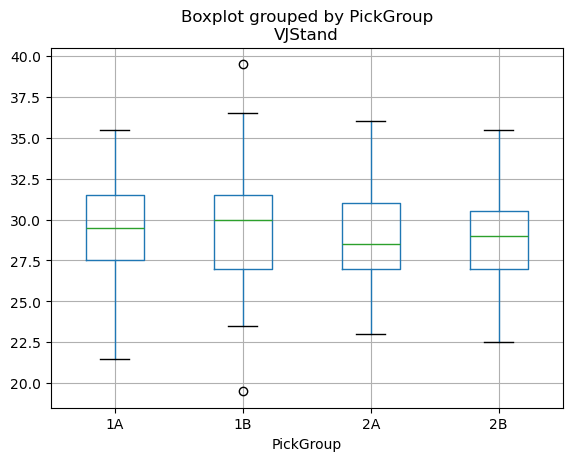

In [36]:
#VJStand Boxplot

nbadata_vjstand.boxplot('VJStand', by='PickGroup')

In [37]:
#VJMax ANOVA

nbadata_vjmax = nbadata.dropna(subset=['VJMax'])

formula = 'VJMax ~ PickGroup'
model = ols(formula, nbadata_vjmax).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = nbadata_vjmax['VJMax'],
                         groups = nbadata_vjmax['PickGroup'],
                         alpha = 0.05)

tukey.summary()

                sum_sq     df         F    PR(>F)
PickGroup    82.627136    3.0  2.309172  0.075931
Residual   4770.953929  400.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1A,1B,0.013,1.0,-1.1916,1.2176,False
1A,2A,-0.9761,0.1622,-2.1881,0.2359,False
1A,2B,-0.8141,0.3255,-2.0502,0.422,False
1B,2A,-0.9891,0.2037,-2.2888,0.3106,False
1B,2B,-0.8271,0.3719,-2.1493,0.4951,False
2A,2B,0.162,0.9892,-1.1669,1.491,False


<Axes: title={'center': 'VJMax'}, xlabel='PickGroup'>

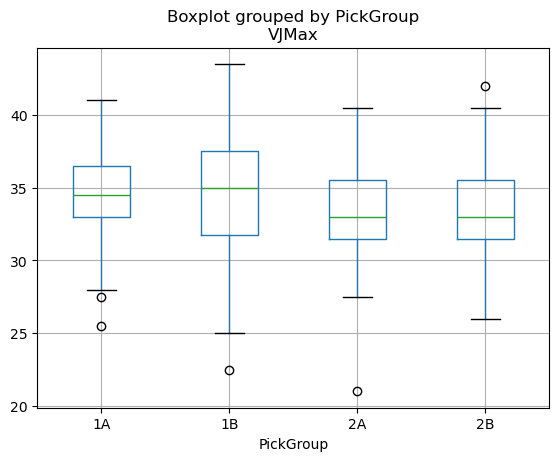

In [38]:
#VJMax Boxplot

nbadata_vjmax.boxplot('VJMax', by='PickGroup')

In [39]:
#Bench Press ANOVA

nbadata_bench = nbadata.dropna(subset=['BenchPress'])

formula = 'BenchPress ~ PickGroup'
model = ols(formula, nbadata_bench).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = nbadata_bench['BenchPress'],
                         groups = nbadata_bench['PickGroup'],
                         alpha = 0.05)

tukey.summary()

                sum_sq     df         F    PR(>F)
PickGroup    98.953653    3.0  1.312968  0.269787
Residual   9697.138655  386.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1A,1B,-0.7383,0.7115,-2.5283,1.0516,False
1A,2A,0.6464,0.7909,-1.1546,2.4474,False
1A,2B,-0.4276,0.9305,-2.2519,1.3967,False
1B,2A,1.3847,0.2411,-0.5222,3.2917,False
1B,2B,0.3107,0.9758,-1.6183,2.2397,False
2A,2B,-1.074,0.4819,-3.0132,0.8652,False


<Axes: title={'center': 'BenchPress'}, xlabel='PickGroup'>

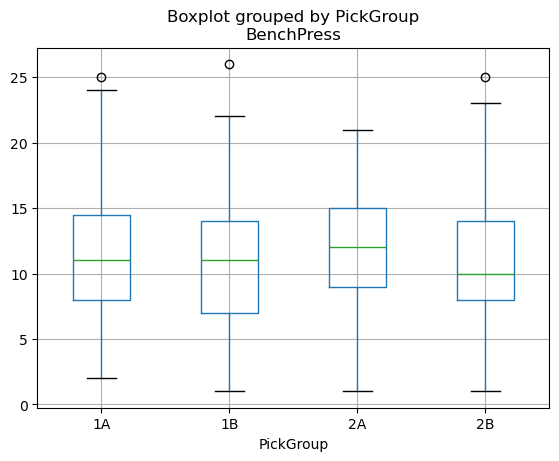

In [40]:
#Bench Press Boxplot

nbadata_bench.boxplot('BenchPress', by='PickGroup')

In [41]:
#Wins Shared (WS) ANOVA

nbadata_ws = nbadata.dropna(subset=['WS'])

formula = 'WS ~ PickGroup'
model = ols(formula, nbadata_ws).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = nbadata_ws['WS'],
                         groups = nbadata_ws['PickGroup'],
                         alpha = 0.05)

tukey.summary()

                  sum_sq     df          F        PR(>F)
PickGroup   79268.577461    3.0  29.323728  4.111324e-17
Residual   350517.919689  389.0        NaN           NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1A,1B,-24.0434,0.0,-34.2044,-13.8824,True
1A,2A,-31.5747,0.0,-42.0455,-21.1039,True
1A,2B,-33.4668,0.0,-45.2211,-21.7125,True
1B,2A,-7.5313,0.3019,-18.6674,3.6049,False
1B,2B,-9.4234,0.2017,-21.7741,2.9273,False
2A,2B,-1.8921,0.9802,-14.499,10.7147,False


<Axes: title={'center': 'WS'}, xlabel='PickGroup'>

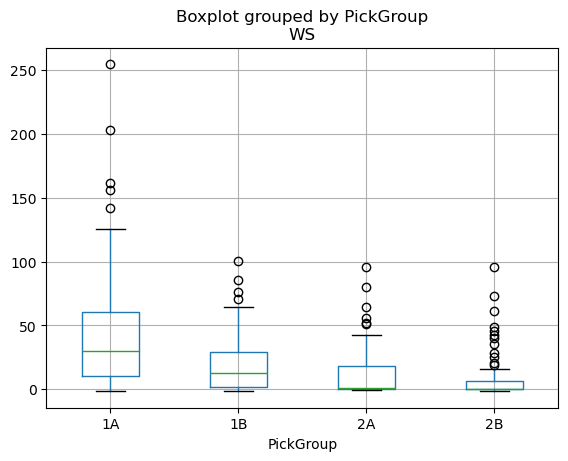

In [42]:
#Wins Shared Boxplot

nbadata_ws.boxplot('WS', by='PickGroup')

In [43]:
#Wins Shared per 48 (WSp48) ANOVA

nbadata_ws48 = nbadata.dropna(subset=['WSp48'])

formula = 'WSp48 ~ PickGroup'
model = ols(formula, nbadata_ws48).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = nbadata_ws48['WSp48'],
                         groups = nbadata_ws48['PickGroup'],
                         alpha = 0.05)

tukey.summary()

             sum_sq     df         F        PR(>F)
PickGroup  0.230006    3.0  15.91795  8.811897e-10
Residual   1.873616  389.0       NaN           NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1A,1B,-0.0413,0.0,-0.0648,-0.0179,True
1A,2A,-0.0474,0.0,-0.0716,-0.0232,True
1A,2B,-0.0629,0.0,-0.0901,-0.0357,True
1B,2A,-0.006,0.9305,-0.0318,0.0197,False
1B,2B,-0.0215,0.2104,-0.0501,0.007,False
2A,2B,-0.0155,0.5173,-0.0447,0.0136,False


<Axes: title={'center': 'WSp48'}, xlabel='PickGroup'>

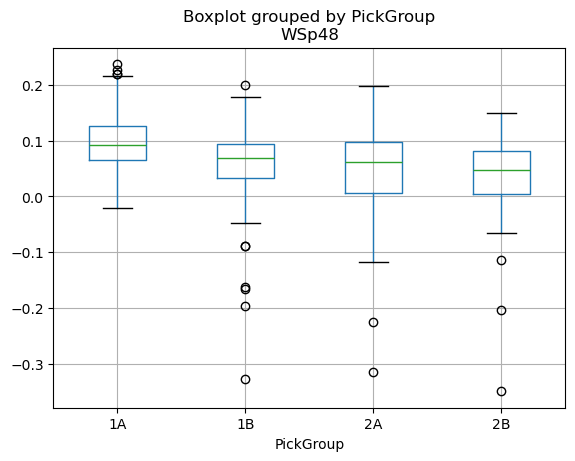

In [44]:
#Wins Shared per 48 (WSp48) Boxplot

nbadata_ws48.boxplot('WSp48', by='PickGroup')

In [45]:
#Age ANOVA

nbadata_age = nbadata.dropna(subset=['Age'])

formula = 'Age ~ PickGroup'
model = ols(formula, nbadata_age).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = nbadata_age['Age'],
                         groups = nbadata_age['PickGroup'],
                         alpha = 0.05)

tukey.summary()

               sum_sq     df          F        PR(>F)
PickGroup  176.890187    3.0  38.197502  6.683571e-22
Residual   663.767501  430.0        NaN           NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1A,1B,1.0105,0.0,0.5912,1.4297,True
1A,2A,1.3973,0.0,0.9769,1.8177,True
1A,2B,1.5611,0.0,1.1306,1.9915,True
1B,2A,0.3868,0.1171,-0.0608,0.8344,False
1B,2B,0.5506,0.0108,0.0935,1.0077,True
2A,2B,0.1638,0.7932,-0.2944,0.6219,False


<Axes: title={'center': 'Age'}, xlabel='PickGroup'>

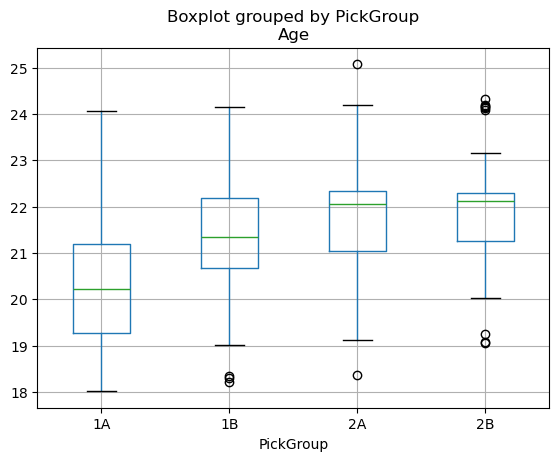

In [46]:
#Age Boxplot

nbadata_age.boxplot('Age', by='PickGroup')

In [47]:
#Linear Regression Analysis

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [48]:
#Linear Regression Weight

weightcorr = nbadata.dropna(subset=['Weight', 'WSp48'])

modweight = smf.ols(formula='WSp48 ~ Weight', data=weightcorr)

resweight = modweight.fit()

print(resweight.summary())

                            OLS Regression Results                            
Dep. Variable:                  WSp48   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     10.56
Date:                Mon, 29 Apr 2024   Prob (F-statistic):            0.00125
Time:                        09:42:31   Log-Likelihood:                 474.05
No. Observations:                 392   AIC:                            -944.1
Df Residuals:                     390   BIC:                            -936.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0315      0.030     -1.061      0.2

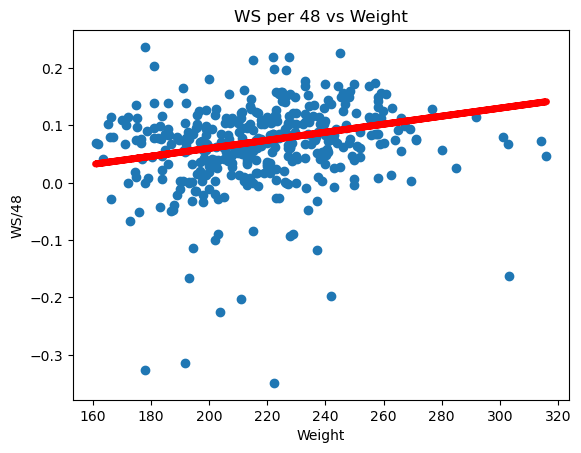

In [49]:
#Linear Regression Plot Weight

plt.scatter(x = weightcorr['Weight'], y = weightcorr['WSp48'])
plt.xlabel('Weight')
plt.ylabel('WS/48')
plt.title('WS per 48 vs Weight')

y_weight =  0.0007 * weightcorr['Weight'] - 0.0798
fig = plt.plot(weightcorr['Weight'], y_weight, lw = 5, c = 'r')

In [50]:
#Linear Regression Height

heightcorr = nbadata.dropna(subset=['Height', 'WSp48'])

modheight = smf.ols(formula='WSp48 ~ Height', data=heightcorr)

resheight = modheight.fit()

print(resheight.summary())

                            OLS Regression Results                            
Dep. Variable:                  WSp48   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.650
Date:                Mon, 29 Apr 2024   Prob (F-statistic):            0.00595
Time:                        09:42:34   Log-Likelihood:                 472.62
No. Observations:                 392   AIC:                            -941.2
Df Residuals:                     390   BIC:                            -933.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1633      0.082     -1.984      0.0

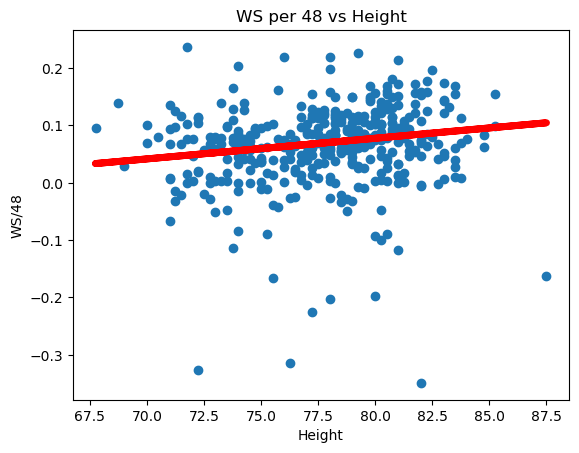

In [51]:
#Linear Regression Plot Height

plt.scatter(x = heightcorr['Height'], y = heightcorr['WSp48'])
plt.xlabel('Height')
plt.ylabel('WS/48')
plt.title('WS per 48 vs Height')

y_height =  0.0036 * heightcorr['Height'] - 0.2103
fig = plt.plot(heightcorr['Height'], y_height, lw = 5, c = 'r')

In [52]:
#Linear Regression Pick

pickcorr = nbadata.dropna(subset=['Pick', 'WSp48'])

modpick = smf.ols(formula='WSp48 ~ Pick', data=pickcorr)

respick = modpick.fit()

print(respick.summary())

                            OLS Regression Results                            
Dep. Variable:                  WSp48   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     38.14
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.65e-09
Time:                        09:42:37   Log-Likelihood:                 488.37
No. Observations:                 393   AIC:                            -972.7
Df Residuals:                     391   BIC:                            -964.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0982      0.007     15.053      0.0

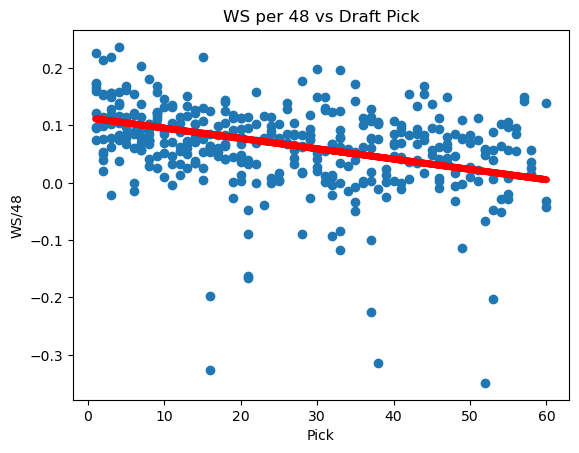

In [53]:
#Linear Regression Plot Pick

plt.scatter(x = pickcorr['Pick'], y = pickcorr['WSp48'])
plt.xlabel('Pick')
plt.ylabel('WS/48')
plt.title('WS per 48 vs Draft Pick')

y_pick =  -0.0018 * pickcorr['Pick'] + 0.1134
fig = plt.plot(pickcorr['Pick'], y_pick, lw = 5, c = 'r')

In [54]:
#Linear Regression Age

agecorr = nbadata.dropna(subset=['Age', 'WSp48'])

modage = smf.ols(formula='WSp48 ~ Age', data=agecorr)

resage = modage.fit()

print(resage.summary())

                            OLS Regression Results                            
Dep. Variable:                  WSp48   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.50
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.11e-06
Time:                        09:42:39   Log-Likelihood:                 482.02
No. Observations:                 393   AIC:                            -960.0
Df Residuals:                     391   BIC:                            -952.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3336      0.055      6.119      0.0

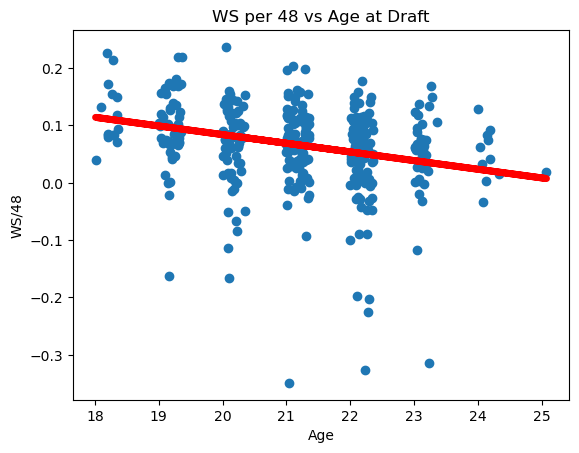

In [55]:
#Linear Regression Plot Age

plt.scatter(x = agecorr['Age'], y = agecorr['WSp48'])
plt.xlabel('Age')
plt.ylabel('WS/48')
plt.title('WS per 48 vs Age at Draft')

y_age =  -0.0151 * agecorr['Age'] + 0.3861
fig = plt.plot(agecorr['Age'], y_age, lw = 5, c = 'r')

In [56]:
#Linear Regression Agility

agilitycorr = nbadata.dropna(subset=['Agility', 'WSp48'])

modagility = smf.ols(formula='WSp48 ~ Agility', data=agilitycorr)

resagility = modagility.fit()

print(resagility.summary())

                            OLS Regression Results                            
Dep. Variable:                  WSp48   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9469
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.331
Time:                        09:42:41   Log-Likelihood:                 444.66
No. Observations:                 363   AIC:                            -885.3
Df Residuals:                     361   BIC:                            -877.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0087      0.075     -0.116      0.9

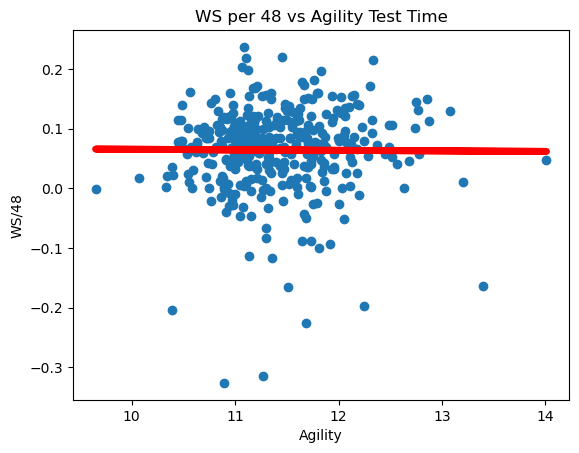

In [57]:
#Linear Regression Plot Agility

plt.scatter(x = agilitycorr['Agility'], y = agilitycorr['WSp48'])
plt.xlabel('Agility')
plt.ylabel('WS/48')
plt.title('WS per 48 vs Agility Test Time')

y_agility =  -0.0009 * agilitycorr['Agility'] + 0.0745
fig = plt.plot(agilitycorr['Agility'], y_agility, lw = 5, c = 'r')

In [58]:
#Linear Regression Sprint

sprintcorr = nbadata.dropna(subset=['Sprint', 'WSp48'])

modsprint = smf.ols(formula='WSp48 ~ Sprint', data=sprintcorr)

ressprint = modsprint.fit()

print(ressprint.summary())

                            OLS Regression Results                            
Dep. Variable:                  WSp48   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.01610
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.899
Time:                        09:42:43   Log-Likelihood:                 450.50
No. Observations:                 367   AIC:                            -897.0
Df Residuals:                     365   BIC:                            -889.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0526      0.092      0.574      0.5

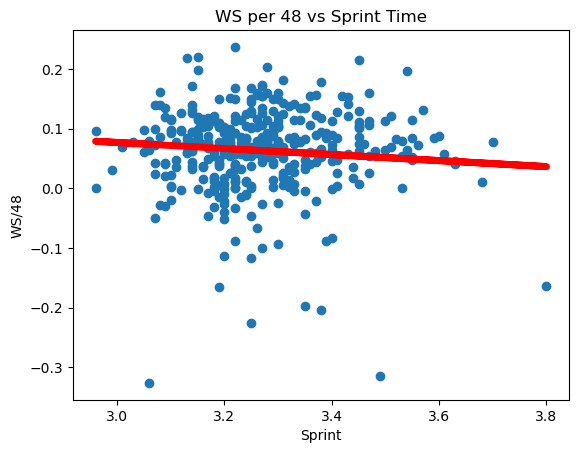

In [59]:
#Linear Regression Plot Sprint

plt.scatter(x = sprintcorr['Sprint'], y = sprintcorr['WSp48'])
plt.xlabel('Sprint')
plt.ylabel('WS/48')
plt.title('WS per 48 vs Sprint Time')

y_sprint =  -0.0506 * sprintcorr['Sprint'] + 0.2287
fig = plt.plot(sprintcorr['Sprint'], y_sprint, lw = 5, c = 'r')

In [60]:
#Linear Regression VJStand

vjstandcorr = nbadata.dropna(subset=['VJStand', 'WSp48'])

modvjstand = smf.ols(formula='WSp48 ~ VJStand', data=vjstandcorr)

resvjstand = modvjstand.fit()

print(resvjstand.summary())

                            OLS Regression Results                            
Dep. Variable:                  WSp48   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.296
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.256
Time:                        09:42:45   Log-Likelihood:                 455.99
No. Observations:                 370   AIC:                            -908.0
Df Residuals:                     368   BIC:                            -900.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0228      0.036      0.625      0.5

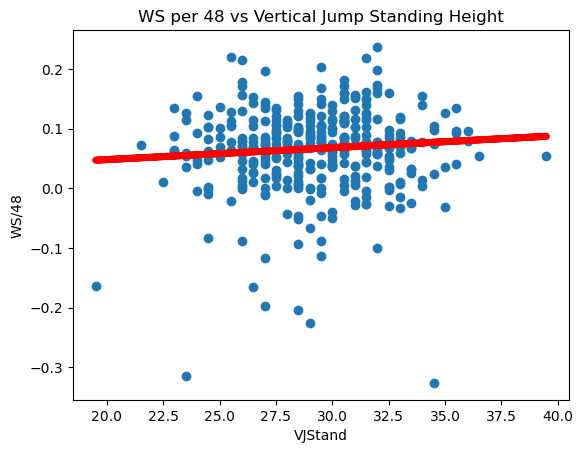

In [61]:
#Linear Regression Plot VJStand

plt.scatter(x = vjstandcorr['VJStand'], y = vjstandcorr['WSp48'])
plt.xlabel('VJStand')
plt.ylabel('WS/48')
plt.title('WS per 48 vs Vertical Jump Standing Height')

y_vjstand =  0.0020 * vjstandcorr['VJStand'] + 0.0082
fig = plt.plot(vjstandcorr['VJStand'], y_vjstand, lw = 5, c = 'r')

In [62]:
#Linear Regression VJMax

vjmaxcorr = nbadata.dropna(subset=['VJMax', 'WSp48'])

modvjmax = smf.ols(formula='WSp48 ~ VJMax', data=vjmaxcorr)

resvjmax = modvjmax.fit()

print(resvjmax.summary())

                            OLS Regression Results                            
Dep. Variable:                  WSp48   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3852
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.535
Time:                        09:42:48   Log-Likelihood:                 452.41
No. Observations:                 368   AIC:                            -900.8
Df Residuals:                     366   BIC:                            -893.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0419      0.036      1.157      0.2

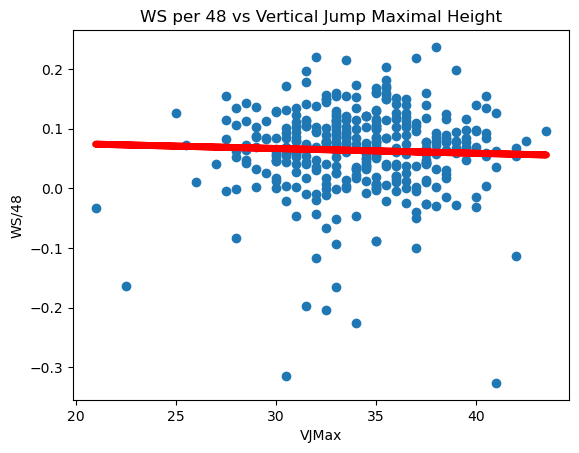

In [63]:
#Linear Regression Plot VJMax

plt.scatter(x = vjmaxcorr['VJMax'], y = vjmaxcorr['WSp48'])
plt.xlabel('VJMax')
plt.ylabel('WS/48')
plt.title('WS per 48 vs Vertical Jump Maximal Height')

y_vjmax =  -0.0008 * vjmaxcorr['VJMax'] + 0.0908
fig = plt.plot(vjmaxcorr['VJMax'], y_vjmax, lw = 5, c = 'r')

In [64]:
#Linear Regression Bench Press

benchcorr = nbadata.dropna(subset=['BenchPress', 'WSp48'])

modbench = smf.ols(formula='WSp48 ~ BenchPress', data=benchcorr)

resbench = modbench.fit()

print(resbench.summary())

                            OLS Regression Results                            
Dep. Variable:                  WSp48   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.114
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.147
Time:                        09:42:50   Log-Likelihood:                 426.37
No. Observations:                 354   AIC:                            -848.7
Df Residuals:                     352   BIC:                            -841.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0499      0.010      5.197      0.0

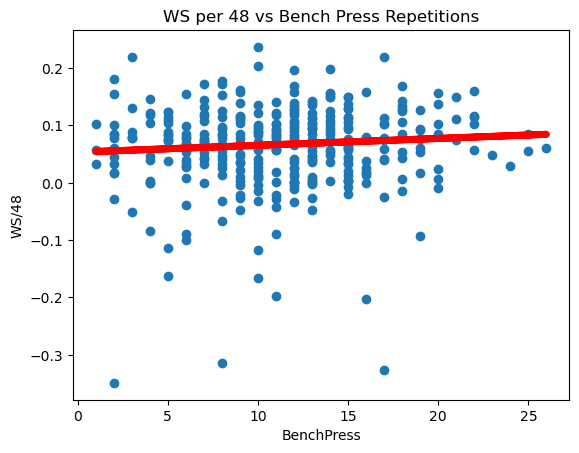

In [65]:
#Linear Regression Plot Bench

plt.scatter(x = benchcorr['BenchPress'], y = benchcorr['WSp48'])
plt.xlabel('BenchPress')
plt.ylabel('WS/48')
plt.title('WS per 48 vs Bench Press Repetitions')

y_bench =  0.0012 * benchcorr['BenchPress'] + 0.0534
fig = plt.plot(benchcorr['BenchPress'], y_bench, lw = 5, c = 'r')